### Load & Inspect Data

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('netflix_titles.csv')

In [9]:
df.info

<bound method DataFrame.info of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mab

In [11]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [12]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [13]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [14]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

### Data Cleaning

In [31]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df['date_added'] =pd.to_datetime(df['date_added'], errors = 'coerce')
df['year_added'] = df['date_added'].dt.year

In [18]:
df['country'] = df['country'].fillna('unknown')
df['rating'] = df['rating'].fillna['not_rated']

### Exploratory Data Analysis

In [78]:
# 1. Movies vs TV Shows

df_type =df['type'].value_counts()

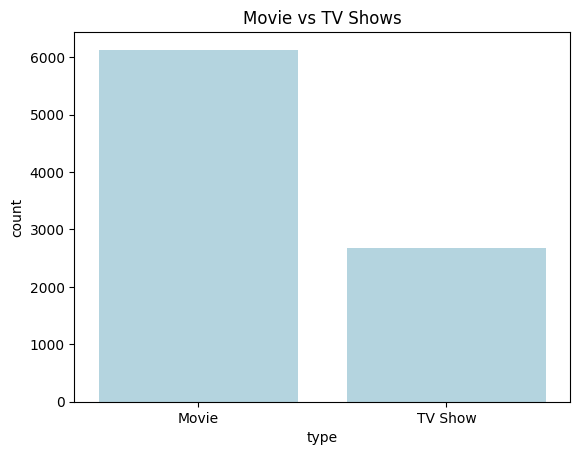

In [37]:
sns.barplot(x=df_type.index, y=df_type.values, color='lightblue')
plt.title('Movie vs TV Shows')
plt.ylabel('count')
plt.show()

In [77]:
# 2. Top 10 Genres

top_genres = df['listed_in'].value_counts().head(10)

C:\Users\rohan\AppData\Local\Temp\ipykernel_2156\2798629083.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_genres.index, x=top_genres.values, palette='muted')


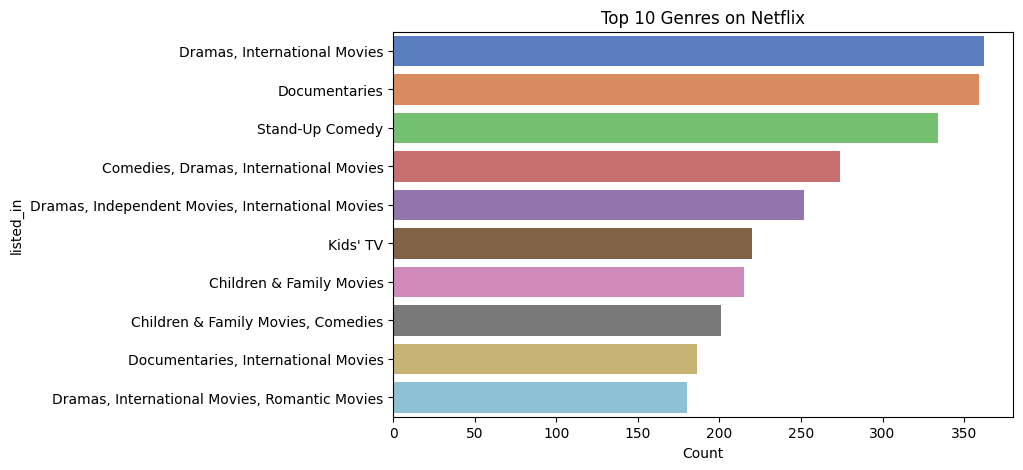

In [46]:
plt.figure(figsize=(8,5))
sns.barplot(y=top_genres.index, x=top_genres.values, palette='muted')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.show()

In [76]:
# 3. Top 10 Countries producing most content

top_countries_prod = df['country'].value_counts().head(10)

C:\Users\rohan\AppData\Local\Temp\ipykernel_2156\985601809.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries_prod.index, x=top_countries_prod.values, palette='muted')


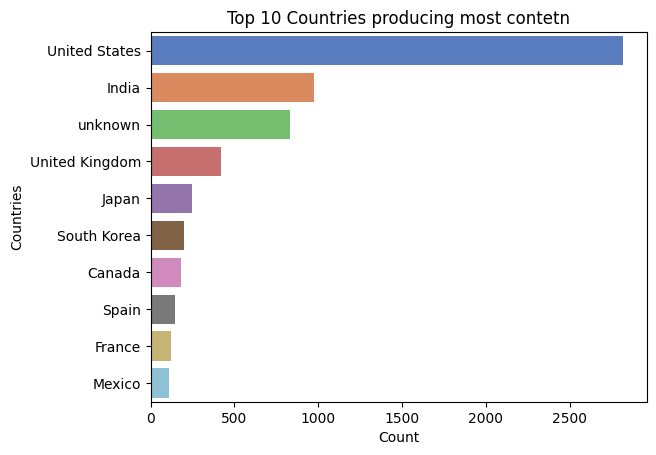

In [49]:
sns.barplot(y=top_countries_prod.index, x=top_countries_prod.values, palette='muted')
plt.title('Top 10 Countries producing most contetn')
plt.ylabel('Countries')
plt.xlabel('Count')
plt.show()

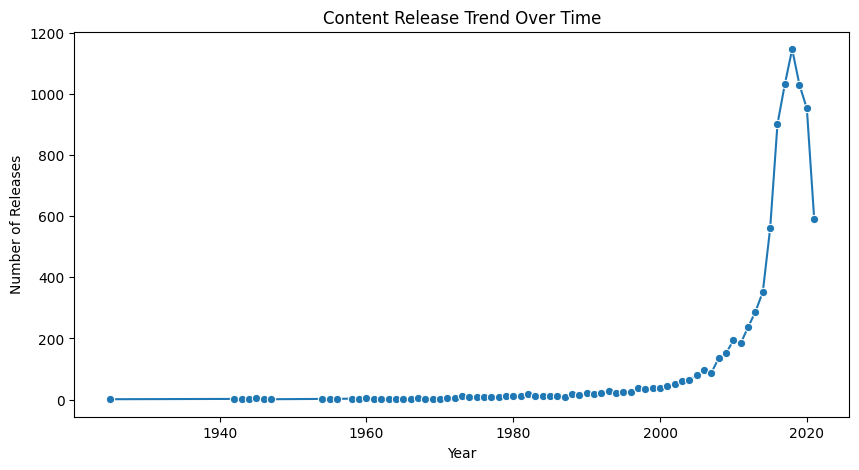

In [75]:
# 4. Releases per Year

releases_per_year = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,5))
sns.lineplot(x=releases_per_year.index, y=releases_per_year.values, marker='o')
plt.title('Content Release Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.show()


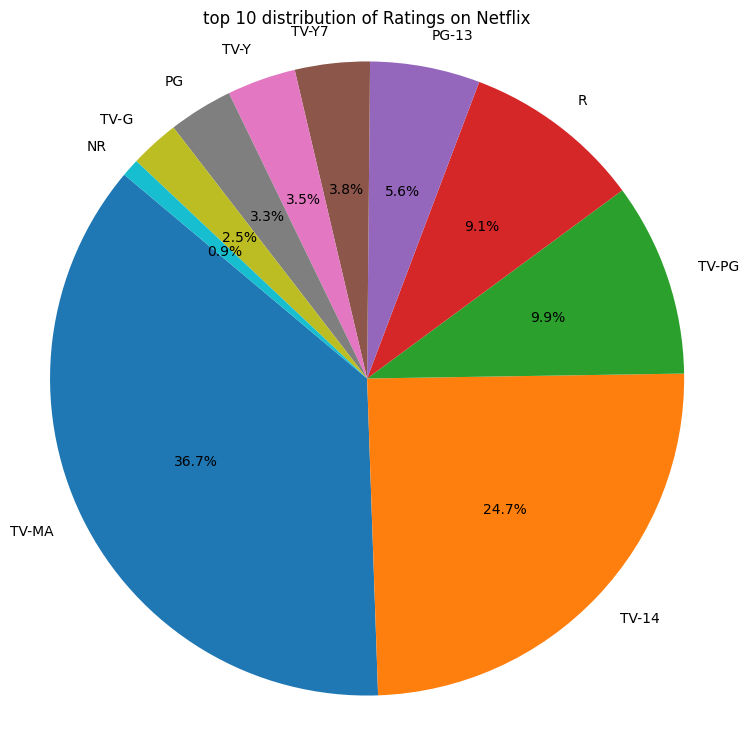

In [74]:
# 5. top 10 Ratings Distribution

rating_counts = df['rating'].value_counts().head(10)
plt.figure(figsize=(9,9))
plt.pie(rating_counts.values, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('top 10 distribution of Ratings on Netflix')
plt.axis('equal')
plt.show()

###  Insights

In [73]:
print("Insights:")
print("1. Netflix has more Movies than TV Shows.")
print("2. The most common genre is '{}'."
      .format(top_genres.index[0]))
print("3. '{}' produces the most Netflix content."
      .format(top_countries_prod.index[0]))
print("4. There has been a significant increase in content after 2015.")
print("5. The most common rating is '{}'."
      .format(rating_counts.index[0]))


Insights:
1. Netflix has more Movies than TV Shows.
2. The most common genre is 'Dramas, International Movies'.
3. 'United States' produces the most Netflix content.
4. There has been a significant increase in content after 2015.
5. The most common rating is 'TV-MA'.


---